In [1]:
import tensorflow

In [10]:
!pip install keras

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [0]:
# import requests
# from random import randint
# from bs4 import BeautifulSoup

In [0]:
# result = requests.get('https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle

# Web Scraping Big Bang Theory Data

In [0]:
# src = result.content

In [0]:
# soup = BeautifulSoup(src,  "html.parser")

In [0]:
## Take all the links from that current page so that we can scrape all the links in the loop in the next cell
# div_web = soup.find("div", {"id": "pages-2"})
# all_links = []

# ## Current page append link
# all_links.append('https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/')

# ## Find the links on that page given the above div part
# links = div_web.findAll('a')

# ## Loop on all the links and save them in an array
# for a in links:
#     if 'About' not in a.text:
#       all_links.append(a['href'])

In [ ]:
import re

In [0]:
# def preprocess_text(text):
    
#     text = text.lower()
#     text = re.sub(r"i'm", "i am", text)
#     text = re.sub(r"he's", "he is", text)
#     text = re.sub(r"she's", "she is", text)
#     text = re.sub(r"it's", "it is", text)
#     text = re.sub(r"that's", "that is", text)
#     text = re.sub(r"what's", "that is", text)
#     text = re.sub(r"where's", "where is", text)
#     text = re.sub(r"how's", "how is", text)
#     text = re.sub(r"\'ll", " will", text)
#     text = re.sub(r"\'ve", " have", text)
#     text = re.sub(r"\'re", " are", text)
#     text = re.sub(r"\'d", " would", text)
#     text = re.sub(r"\'re", " are", text)
#     text = re.sub(r"won't", "will not", text)
#     text = re.sub(r"can't", "cannot", text)
#     text = re.sub(r"n't", " not", text)
#     text = re.sub(r"n'", "ng", text)
#     text = re.sub(r"'bout", "about", text)
#     text = re.sub(r"'til", "until", text)
#     text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    
#     return text


# ## In variable text - speaker and then their conversations will be stored
# speaker_text= []
# ## To calculate conversations lost due to web scraping 
# conversation_lost = 0

# ## loop on all the links from where we have to scrap data
# for link in all_links:
  
# ## request on that link 
#     result = requests.get(link)

# ## got the content
#     src = result.content
# ## Create Beautiful soup object  
#     soup = BeautifulSoup(src,'html.parser')
# ## Find div element with the given class
#     data = soup.find("div",class_ = "entrytext")
  
# ## FInd paragraph children element
#     paragraph_text = data.findChildren("p")
  
# ## final_conversation stores conversations of big bang theory on that particular 
# #page 
#     final_conversation = []
 
#   ## loop on all the p elements
#     for p in paragraph_text:
#       ## Get the conversation based on the given page
#         conversation = p.find("span")
#         if conversation != None and len(list(conversation.descendants)) == 1:
#           final_conversation.append(conversation.contents)
#         elif conversation == None:
#            final_conversation.append(p.text)
#         else:
#           conversation_lost += 1
    
# ## seperate speaker and content based on the conversations  
#     for conversation in final_conversation:
#       try:
#         speaker, content = ''.join(conversation).split(":", 1)
#       except ValueError:
#         continue
#       if speaker and content:
# ## if speaker and content is not empty then append the conversations in the text list
#         speaker_text.append([speaker,preprocess_text(content.strip())])
                 

In [0]:
# np.save("/content/drive/My Drive/speaker_text.npy",np.asarray(speaker_text))

In [0]:
# Loading speaker and repsonse data
# speaker_text = np.load("/content/drive/My Drive/speaker_text.npy")

# Speaker and Reponse - x_train and y_train

In [0]:
# Creating speaker and response data

# x_train = []
# y_train = []

# ## process the conversation to apply on gensim model
# first_row = True
# for data in speaker_text:
#     if first_row == True:
#       old = data[1]
#       first_row = False
#       continue
# ## X_train and y_train are in the form of questions and
# ##answers which will be later passed to gensim model
#     x_train.append(old)
#     y_train.append(data[1])
#     old = data[1]
    
# ## create a corpus now and train the gensim model    
# corpus = x_train + y_train

In [0]:
# np.save("/content/drive/My Drive/x_train.npy",np.asarray(x_train))
# np.save("/content/drive/My Drive/y_train.npy",np.asarray(y_train))

In [0]:
## Loading speaker and response data 
# x_train = np.load("/content/drive/My Drive/x_train.npy")
# y_train = np.load("/content/drive/My Drive/y_train.npy")

# Appending 'bos' and 'eos' for the decoder data

In [0]:
# bos = '<bos> '
# eos = ' <eos>'

In [0]:
# y_train_input = [bos + convs + eos for convs in y_train]

In [0]:
# x_train = list(x_train)

In [42]:
# len(x_train)

53331

In [0]:
# corpus is the conversation of speaker and response data with bos and eos
# corpus = x_train + y_train_input

In [41]:
# len(corpus)

106662

In [0]:
# Creating a 2d array to fit the corpus in tokenizer
# corpus_list = [sent.split() for sent in corpus]

In [0]:
vocab_size = 15000

# Using Keras tokenizer to fit on corpus to get the word index combination

In [0]:
# Initializing tokenizer with vocab size = 15000
# tokenizer = Tokenizer(num_words=vocab_size)

In [0]:
## tokenizer is learning 
# tokenizer.fit_on_texts(corpus_list)

In [5]:
import pickle

In [0]:
# with open('/content/drive/My Drive/tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [0]:
# a dictionary of word to index of 15000 most used words
# word_idx = tokenizer.word_index

In [0]:
# Creating a dictionary of word to index and index to word 
# index_word = {}
# word_index = {}
# for word, index in word_idx.items():
#     if index < 15000:
#         index_word[index] = word
#         word_index[word] = index

In [0]:
# with open('/content/drive/My Drive/index_word.pickle', 'wb') as fp:
#     pickle.dump(index_word, fp)
# with open('/content/drive/My Drive/word_index.pickle', 'wb') as fp:
#     pickle.dump(word_index, fp)

In [14]:
with open('index_word.pickle', 'rb') as handle:
    index_word = pickle.load(handle)
with open('word_index.pickle', 'rb') as handle:
    word_index = pickle.load(handle)

In [0]:
# index_word

# Only taking the first 13 Characters and then appending 'bos 'and 'eos' in decoder input

In [0]:
# Using only 13 characters then appending index of bos and eos in the 
# y_train1 = []
# for y_row in y_train:
#     y_train1.append(' '.join(y_row.split()[:13]))

In [0]:
## Appending string bos and eos
# y_train1 = [bos + convs + eos for convs in y_train1]

In [0]:
# y_train1

In [0]:
# Replacing word with index 
# encoding_seq = []
# for sentence in x_train:
#     encoding_seq.append([word_index[word] for word in sentence.split() if word in word_index])
# decoding_seq = []
# for sentence in y_train1:
#     decoding_seq.append([word_index[word] for word in sentence.split() if word in word_index])            
            

# Padding 0's at the end of the string 

In [0]:
# max_len = 15
# def padding_sequences(encoding_seq,decoding_seq):
#     encoding_data = pad_sequences(encoding_seq, maxlen = max_len, dtype='int32', padding='post', truncating='post')
#     decoding_data = pad_sequences(decoding_seq, maxlen = max_len, dtype='int32', padding='post', truncating='post')
#     return encoding_data,decoding_data

In [0]:
# encoding_data,decoding_data = padding_sequences(encoding_seq,decoding_seq)

In [0]:
# with open("/content/drive/My Drive/decoding_data.pickle", "wb") as fp: 
#     pickle.dump(decoding_data, fp)

# with open("/content/drive/My Drive/encoding_data.pickle", "wb") as fp: 
#     pickle.dump(encoding_data, fp)

In [6]:

with open("encoding_data.pickle", "rb") as fp:
    encoding_data = pickle.load(fp)
    
with open("decoding_data.pickle", "rb") as fp:
    decoding_data = pickle.load(fp)

In [7]:
decoding_data

array([[   1,  980,  123, ...,    0,    0,    0],
       [   1,  136,   24, ...,    7, 6033,    2],
       [   1,  258,   14, ...,    0,    0,    0],
       ...,
       [   1,    8,    4, ...,   21,   14,    2],
       [   1,   17,   41, ...,    0,    0,    0],
       [   1,   37,   11, ..., 1551,   12,    2]])

# Getting decoding labels or decoder outputs using One Hot encoding 

In [12]:
no_of_conves = len(encoding_data)
max_len = 15
vocab_size = 15000
## Get Decoding Labels
def get_decoding_labels(decoding_input_data):
    decoding_labels = np.zeros((no_of_conves, max_len, vocab_size), dtype= np.float16)
    for i, sequences in enumerate(decoding_input_data):
        for j, sequence in enumerate(sequences):
            if j > 0:
                decoding_labels[i][j - 1][sequence] = 1.
    return decoding_labels

In [13]:
decoding_labels = get_decoding_labels(decoding_data)

MemoryError: 

#Generating Embedding matrix for embedding layer

In [0]:
embeddings_dict = {}

## just tried with glove word2vec to check that the performance is good or not 
with open("/content/drive/My Drive/glove.6B.100d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

embedding_dim = 100
# embedding_words = {}
embedding_matrix = np.zeros((len(index_word) + 1,embedding_dim ))
count = 0 
## create embedding matrix using word vector from glove
for i,word in index_word.items():
    if word != '<bos>' and word != '<eos>':
        if word in embeddings_dict:
            embedding_matrix[i] = embeddings_dict[word]
        # else:
            # print(word)
        
del embeddings_dict        

In [0]:
from keras.layers import Embedding
from keras.layers import Input, Dense, LSTM, TimeDistributed
from keras.models import Model

# Insert Embedding Layer

In [0]:
def create_embedding_layer():
## Create Embedding Layer    
    embed_layer = Embedding(input_dim=vocab_size, output_dim = 100, trainable=True,)
    embed_layer.build((None,))
    embed_layer.set_weights([embedding_matrix])
    return embed_layer

In [12]:
embed_layer = create_embedding_layer()

# Build Model Function

In [0]:
def build_model(hidden_lstm_cell):

## inputs - Embedding Layer - LSTM cell where each gives us states_h and states_c    
    encoder_inputs = Input(shape=(max_len, ), dtype='int32',)
    encoder_embedding = embed_layer(encoder_inputs)
    encoder_LSTM = LSTM(hidden_lstm_cell, return_state=True)
    _, state_h, state_c = encoder_LSTM(encoder_embedding)
    
## Outputs - decoder inputs - embedding layer - LSTM cell - Dense layer softmax function - which gives output to 0 - 1
## and compare with decoder labels
    decoder_inputs = Input(shape=(max_len, ), dtype='int32',)
    decoder_embedding = embed_layer(decoder_inputs)
    decoder_LSTM = LSTM(hidden_lstm_cell, return_state=True, return_sequences=True)
    decoder_outputs, _, _ = decoder_LSTM(decoder_embedding, initial_state=[state_h, state_c])
    
    # dense_layer = Dense(VOCAB_SIZE, activation='softmax')
    outputs = TimeDistributed(Dense(vocab_size, activation='softmax'))(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], outputs)
    
    return model

In [0]:
seq2seq_model = build_model(hidden_lstm_cell = 300)

In [15]:
seq2seq_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 15)           0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 15)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 15, 100)      1500000     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 300), (None, 481200      embedding_1[0][0]          

# Loss = Categorical CrossEntropy , Optimizer - ADAM

In [16]:
### Seq2Seq Model Optimizer , Loss , metrics used
seq2seq_model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# seq2seq_model.save('/content/drive/My Drive/epochs_0.h5')

In [0]:
from keras.models import load_model
## Its written 50 but it was trained on 15 epochs
seq2seq_model = load_model('/content/drive/My Drive/epochs_220.h5')

# Run Model with batch size = 400 and epochs = 20

In [19]:
EPOCHS = 20
BATCH_SIZE = 400
history = seq2seq_model.fit([encoding_data, decoding_data], 
                     decoding_labels, 
                     epochs=EPOCHS, 
                     batch_size=BATCH_SIZE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
53331/53331 [==============================] - 127s 2ms/step - loss: 4.3091 - acc: 0.4118
Epoch 2/20
53331/53331 [==============================] - 118s 2ms/step - loss: 3.5513 - acc: 0.4751
Epoch 3/20
53331/53331 [==============================] - 121s 2ms/step - loss: 3.4554 - acc: 0.4808
Epoch 4/20
53331/53331 [==============================] - 122s 2ms/step - loss: 3.3861 - acc: 0.4830
Epoch 5/20
53331/53331 [==============================] - 122s 2ms/step - loss: 3.3215 - acc: 0.4889
Epoch 6/20
53331/53331 [==============================] - 122s 2ms/step - loss: 3.2656 - acc: 0.4934
Epoch 7/20
53331/53331 [==============================] - 122s 2ms/step - loss: 3.2137 - acc: 0.4982
Epoch 8/20
53331/53331 [==============================] - 122s 2ms/step - loss: 3.1543 - acc: 0.5039
Epoch 9/20
53331/53331 [==============================] - 122s 2ms/step - loss: 3.1040 - acc: 0.

In [0]:
seq2seq_model.save('epochs_240.h5')

In [0]:
with open('seq2seqhist_240.pickle', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [16]:
import re
from keras.preprocessing.sequence import pad_sequences
## doing preprocessing 


In [17]:

## Preprocess Test Data Function
def preprocess_text(text):
    
    text = text.lower()
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n'", "ng", text)
    
    
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    
    return text


## Sample test Data
speaker_test_data = ["whats up",
                    "hi",
                    "how are you",
                    "Thank You",
                    "Sorry"
                    ]


In [18]:
reference_test_output = [ " Nothing much",
                         "Hello",
                         "I am fine",
                         "You're Welcome"
                         "No problem"
                        ]

In [19]:
# import rouge as Rouge

def test_data():

  scores = 0
  max_len = 15
  ## Decoding input data for test set
  decoding_input_test_data = np.asarray([np.zeros((15,))])
  ## Appending index of '<bos>' and '<eos>
  for a_array in decoding_input_test_data:
      a_array[0] = word_index['<bos>']
      a_array[14] = word_index['<eos>']
  ## input string 
  for i,test_encoder_string in enumerate(speaker_test_data):
      print("\n" + test_encoder_string + "\n")
      encoding_test_seq = []
      test_encoder_string = preprocess_text(test_encoder_string)
      ## Split the string
      test_encoder_words = test_encoder_string.split()
      encoding_test_seq.append([word_index[word] for word in test_encoder_words if word in word_index])

      # encoding_test_seq = tokenizer.texts_to_sequences(test_encoder_words)
      # print("encoding_test", encoding_test_seq)
      encoding_test_data = pad_sequences(encoding_test_seq, maxlen = max_len, dtype='int32', padding='post', truncating='post')
      # print(encoding_test_data)
      decoding_test_pdata = seq2seq_model.predict([encoding_test_data, decoding_input_test_data])
      decoding_test_pdata = decoding_test_pdata[0][:,:14]
      decoding_test_pdata = np.argmax(decoding_test_pdata, axis=1)
      response_test_data = ''
      for i in decoding_test_pdata:
          if i in index_word:
            if index_word[i] !='<eos>':
              response_test_data += index_word[i] + " "
      # scores += abs(rouge1.get_scores(response_test_data, reference_test_output[i]))

      print(response_test_data)
  # print("Average Rouge Score -  ",scores/len(reference_test_output))

In [20]:
 ## Test output after 60 epochs 
 test_data()


whats up



NameError: name 'seq2seq_model' is not defined

In [0]:
def plot_data():
    plt.plot(history.history['acc'])
    plt.title('Model accuracy First 200 Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.title('Model loss First 200 Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

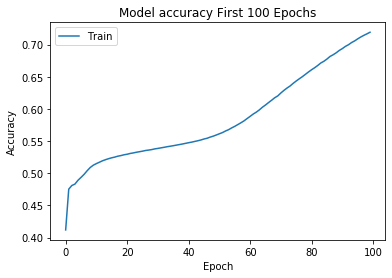

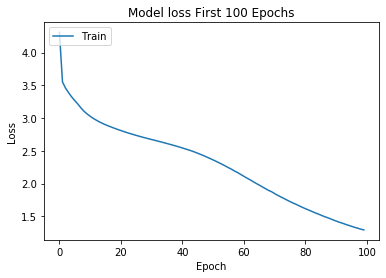

In [61]:
plot_data()